In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests
from math import floor

In [5]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/80,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,15/12/80,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,16/12/80,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,17/12/80,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,18/12/80,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [6]:
df.shape

(10468, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [8]:
df.describe().T.apply(lambda x: x.apply("{0:.3f}".format))

,count,mean,std,min,25%,50%,75%,max
Open,10468.000,14.758,31.914,0.050,0.283,0.474,14.953,182.630
High,10468.000,14.921,32.289,0.050,0.289,0.483,15.057,182.940
Low,10468.000,14.594,31.544,0.049,0.277,0.466,14.693,179.120
Close,10468.000,14.764,31.929,0.049,0.283,0.475,14.902,182.010
Adj Close,10468.000,14.130,31.637,0.038,0.235,0.392,12.835,181.512
Volume,10468.000,330848870.099,338841842.881,0.000,123776800.000,218159200.000,410579400.000,7421640800.000


In [9]:
print(df.duplicated().sum())

0


In [10]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
df["Date"] = pd.to_datetime(df["Date"])

<ipython-input-11-cc2372053ca6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [12]:
df.shape

(10468, 7)

In [13]:
window_size = 10

In [14]:
df["MA"] = df["Close"].rolling(window_size).mean()

In [20]:
print(df["MA"])

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10463    144.860004
10464    143.252004
10465    141.924002
10466    139.809001
10467    138.427001
Name: MA, Length: 10468, dtype: float64


,Date,Open,High,Low,Close,Adj Close,Volume,MA
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,NaN
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,NaN
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,NaN
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,NaN
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,0.129687


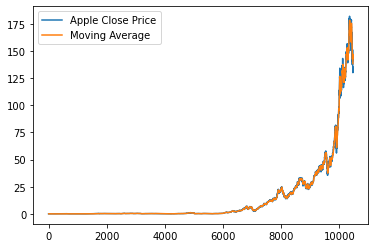

In [16]:
plt.plot(df["Close"], label="Apple Close Price")
plt.plot(df["MA"], label="Moving Average")
plt.legend()
plt.show()